In [29]:
import matplotlib.pyplot as plt
import numpy as np
from wand.image import Image

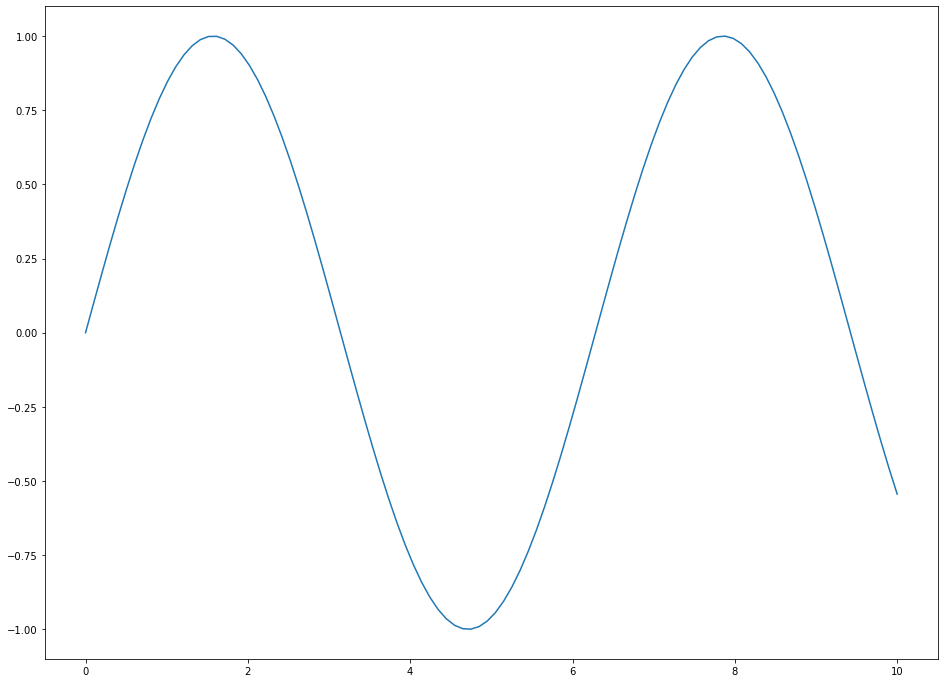

In [33]:
x = np.linspace(0, 10, 100)
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(16,12),facecolor=(1, 1, 1))
ax.plot(x, np.sin(x), antialiased=True)
fig.savefig("test-aliased.pdf")
im = Image(filename="test-aliased.pdf")
im.antialias = False
im.convert('png')
im.antialias = False
im.save(filename='test-aliased.png')

fig.savefig("test-antialiased.png")